In [111]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [112]:
%store -r

In [113]:
sns.set(rc = {'figure.figsize':(12,8)})
%config InlineBackend.figure_format = 'retina'

In [68]:
sensors = list(dataframes.keys())

In [71]:
total_points = {}
gw_1_switch_counts = {}
for sensor in sensors:
    c = 0
    df = dataframes[sensor]
    for i in range(df.shape[0]-1):
        if (df.iloc[i]['gw_1_id'] != df.iloc[i+1]['gw_1_id']):
            c += 1
    gw_1_switch_counts[sensor] = c
    total_points[sensor] = df.shape[0]

In [72]:
for key, value in gw_1_switch_counts.items():
    print(f"For {key} : {value} gateway 1 switches")

For light_maroon_penguin : 18683 gateway 1 switches
For useless_crimson_rook : 0 gateway 1 switches
For closed_wagon_snail : 1256 gateway 1 switches
For handsome_violet_leech : 0 gateway 1 switches
For easily_dear_mouse : 5 gateway 1 switches
For daily_ace_bear : 14 gateway 1 switches
For bored_blue_fish : 5769 gateway 1 switches
For highly_master_pony : 0 gateway 1 switches
For boring_olive_stingray : 0 gateway 1 switches
For lonely_quiet_bear : 44 gateway 1 switches
For likely-well-thrush : 0 gateway 1 switches
For barely_hot_aphid : 10 gateway 1 switches
For mildly_calm_ibex : 27 gateway 1 switches
For big_pink_elephant : 0 gateway 1 switches
For widely_whole_tarpon : 0 gateway 1 switches
For lovely_helped_lamb : 6751 gateway 1 switches
For duly_star_bee : 13814 gateway 1 switches
For poorly_sunny_earwig : 0 gateway 1 switches
For mainly_kind_boxer : 486 gateway 1 switches
For daily_new_falcon : 4050 gateway 1 switches
For daily_gentle_beetle : 24018 gateway 1 switches
For weekly_fa

37.73584961891174
62.26415038108826


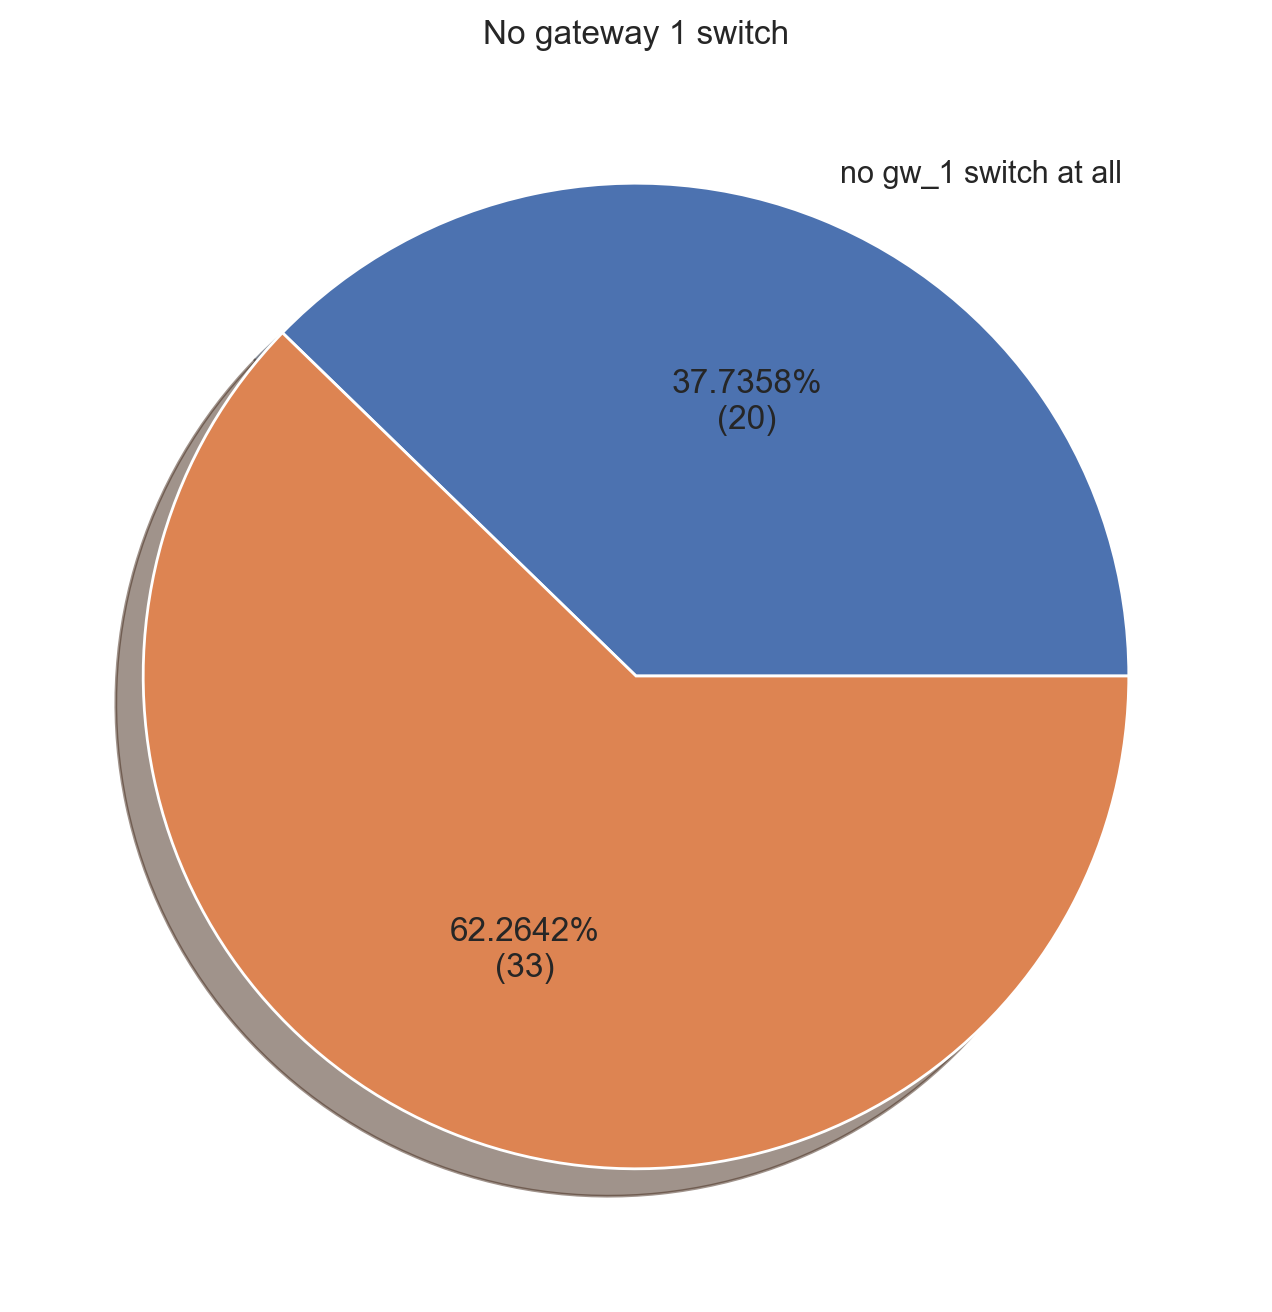

In [77]:
a = 0
for key, value in gw_1_switch_counts.items():
    if value == 0:
        a += 1
        
total = len(sensors)
no_change = a

def my_fmt(x):
    print(x)
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)


# Calculate the number of non-unique items
change = total - change

# Create the pie chart
labels = ['no gw_1 switch at all', '']
counts = [no_change, change]
colors = ['red', 'purple']

plt.pie(counts, labels=labels, autopct= my_fmt, shadow=True)

# Add a title
plt.title('No gateway 1 switch')

# Display the pie chart
plt.show()

#### Now looking at the histogram of the sensor which had gw_1 switch

<AxesSubplot:>

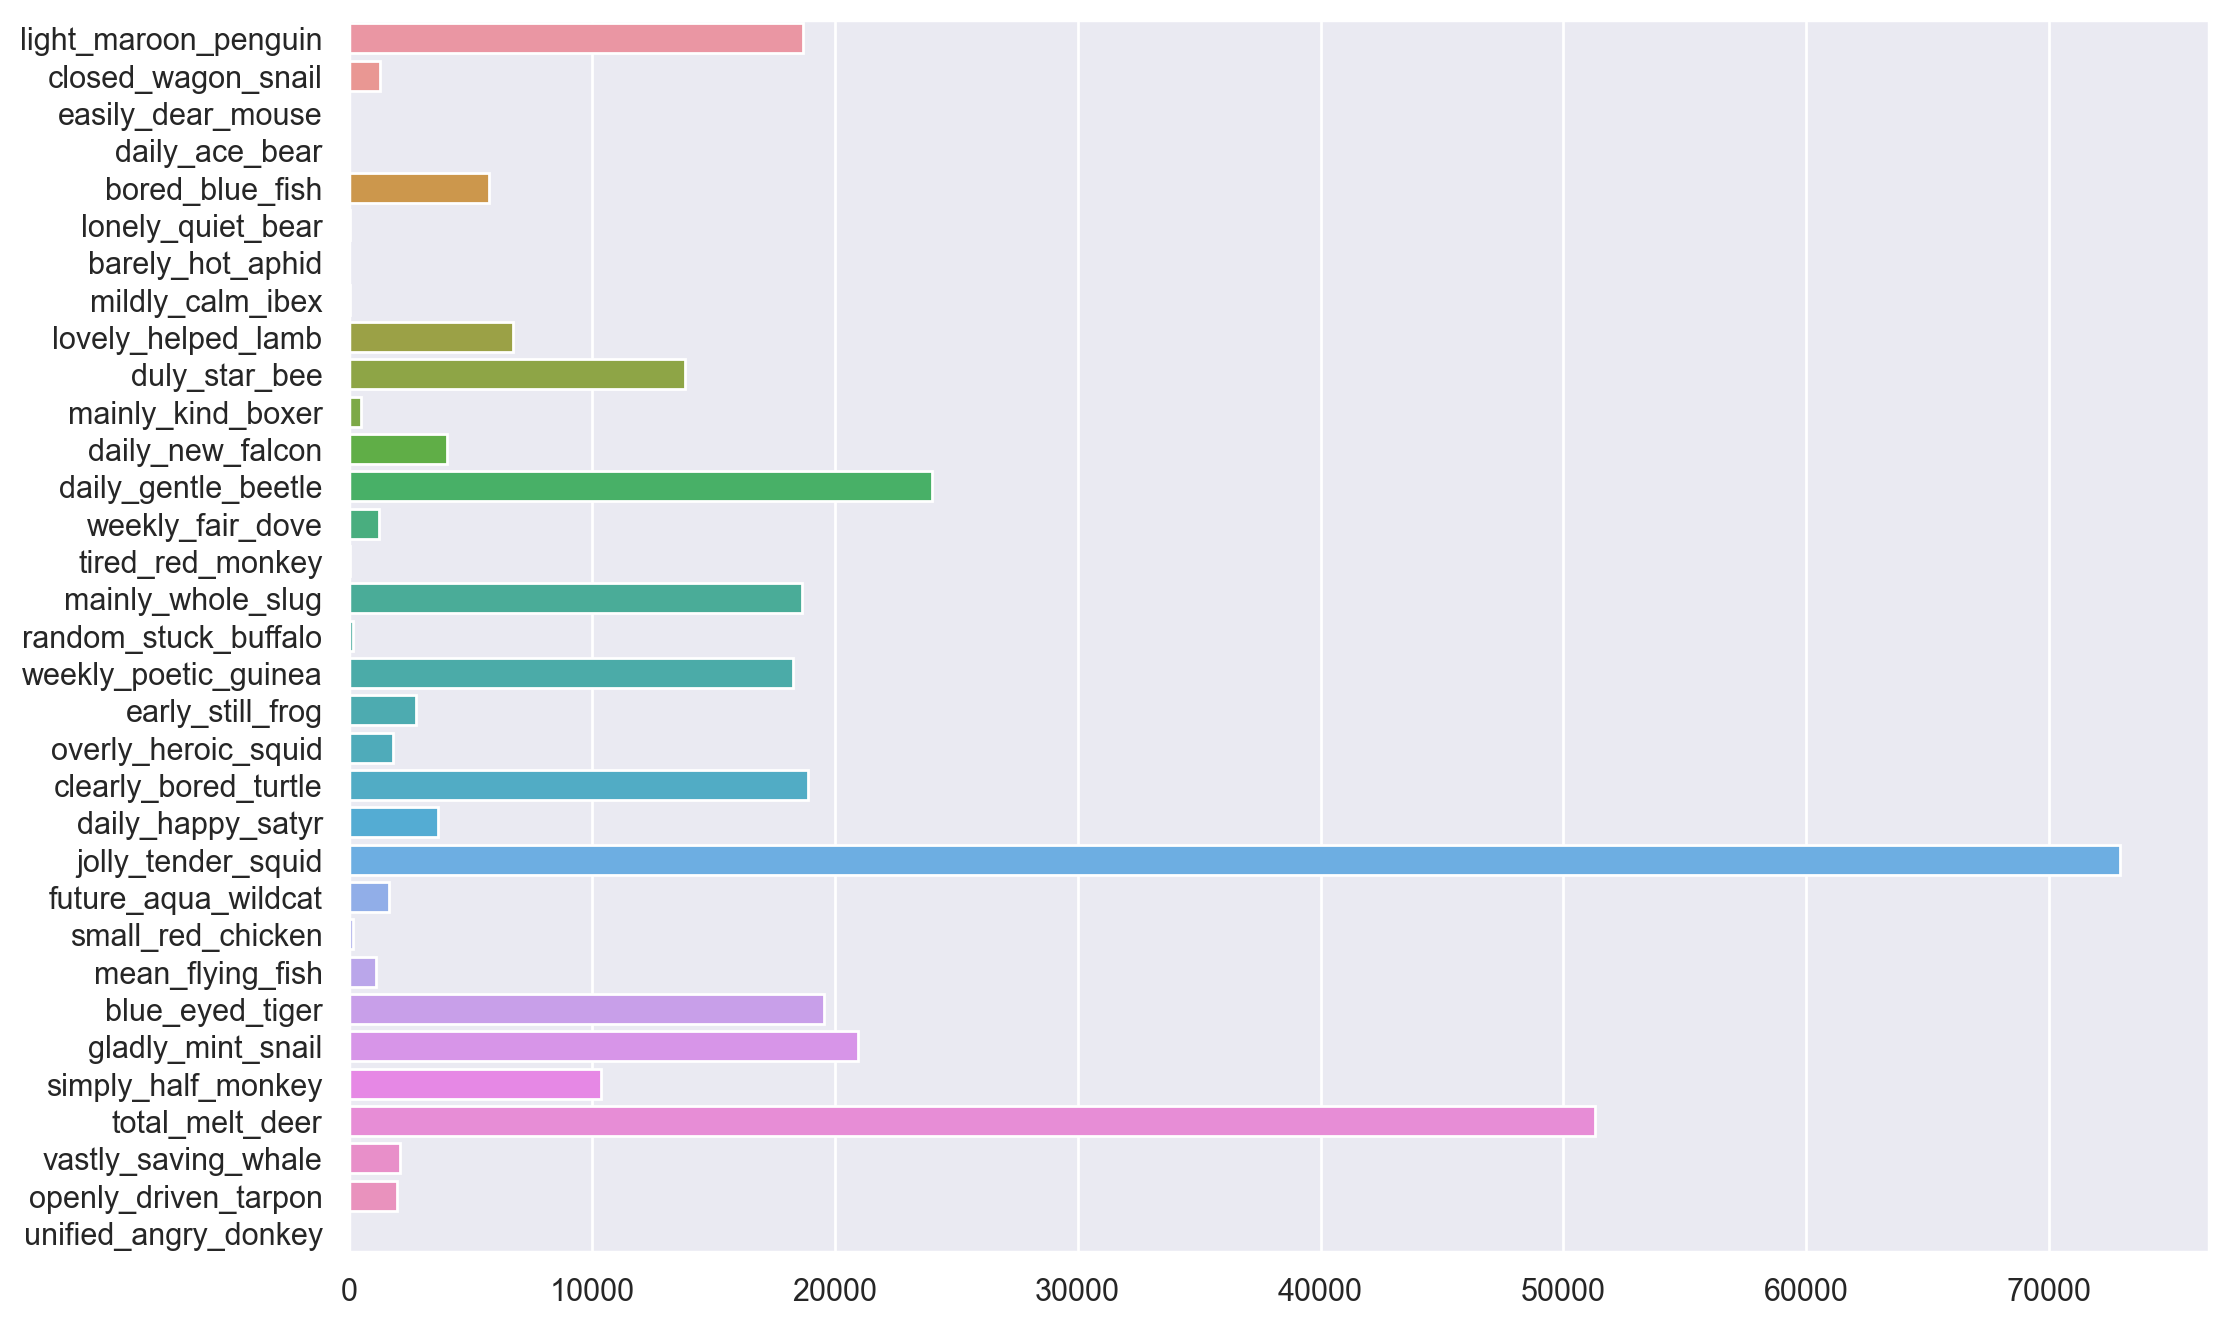

In [78]:
x_sensor = []
count = []
for key, value in gw_1_switch_counts.items():
    if value != 0:
        x_sensor.append(key)
        count.append(value)
        
sns.barplot(x=count, y=x_sensor, orient = 'h' )

In [83]:
## getting total number of data points for each sensor

total_x_points = [total_points[key] for key in x_sensor]

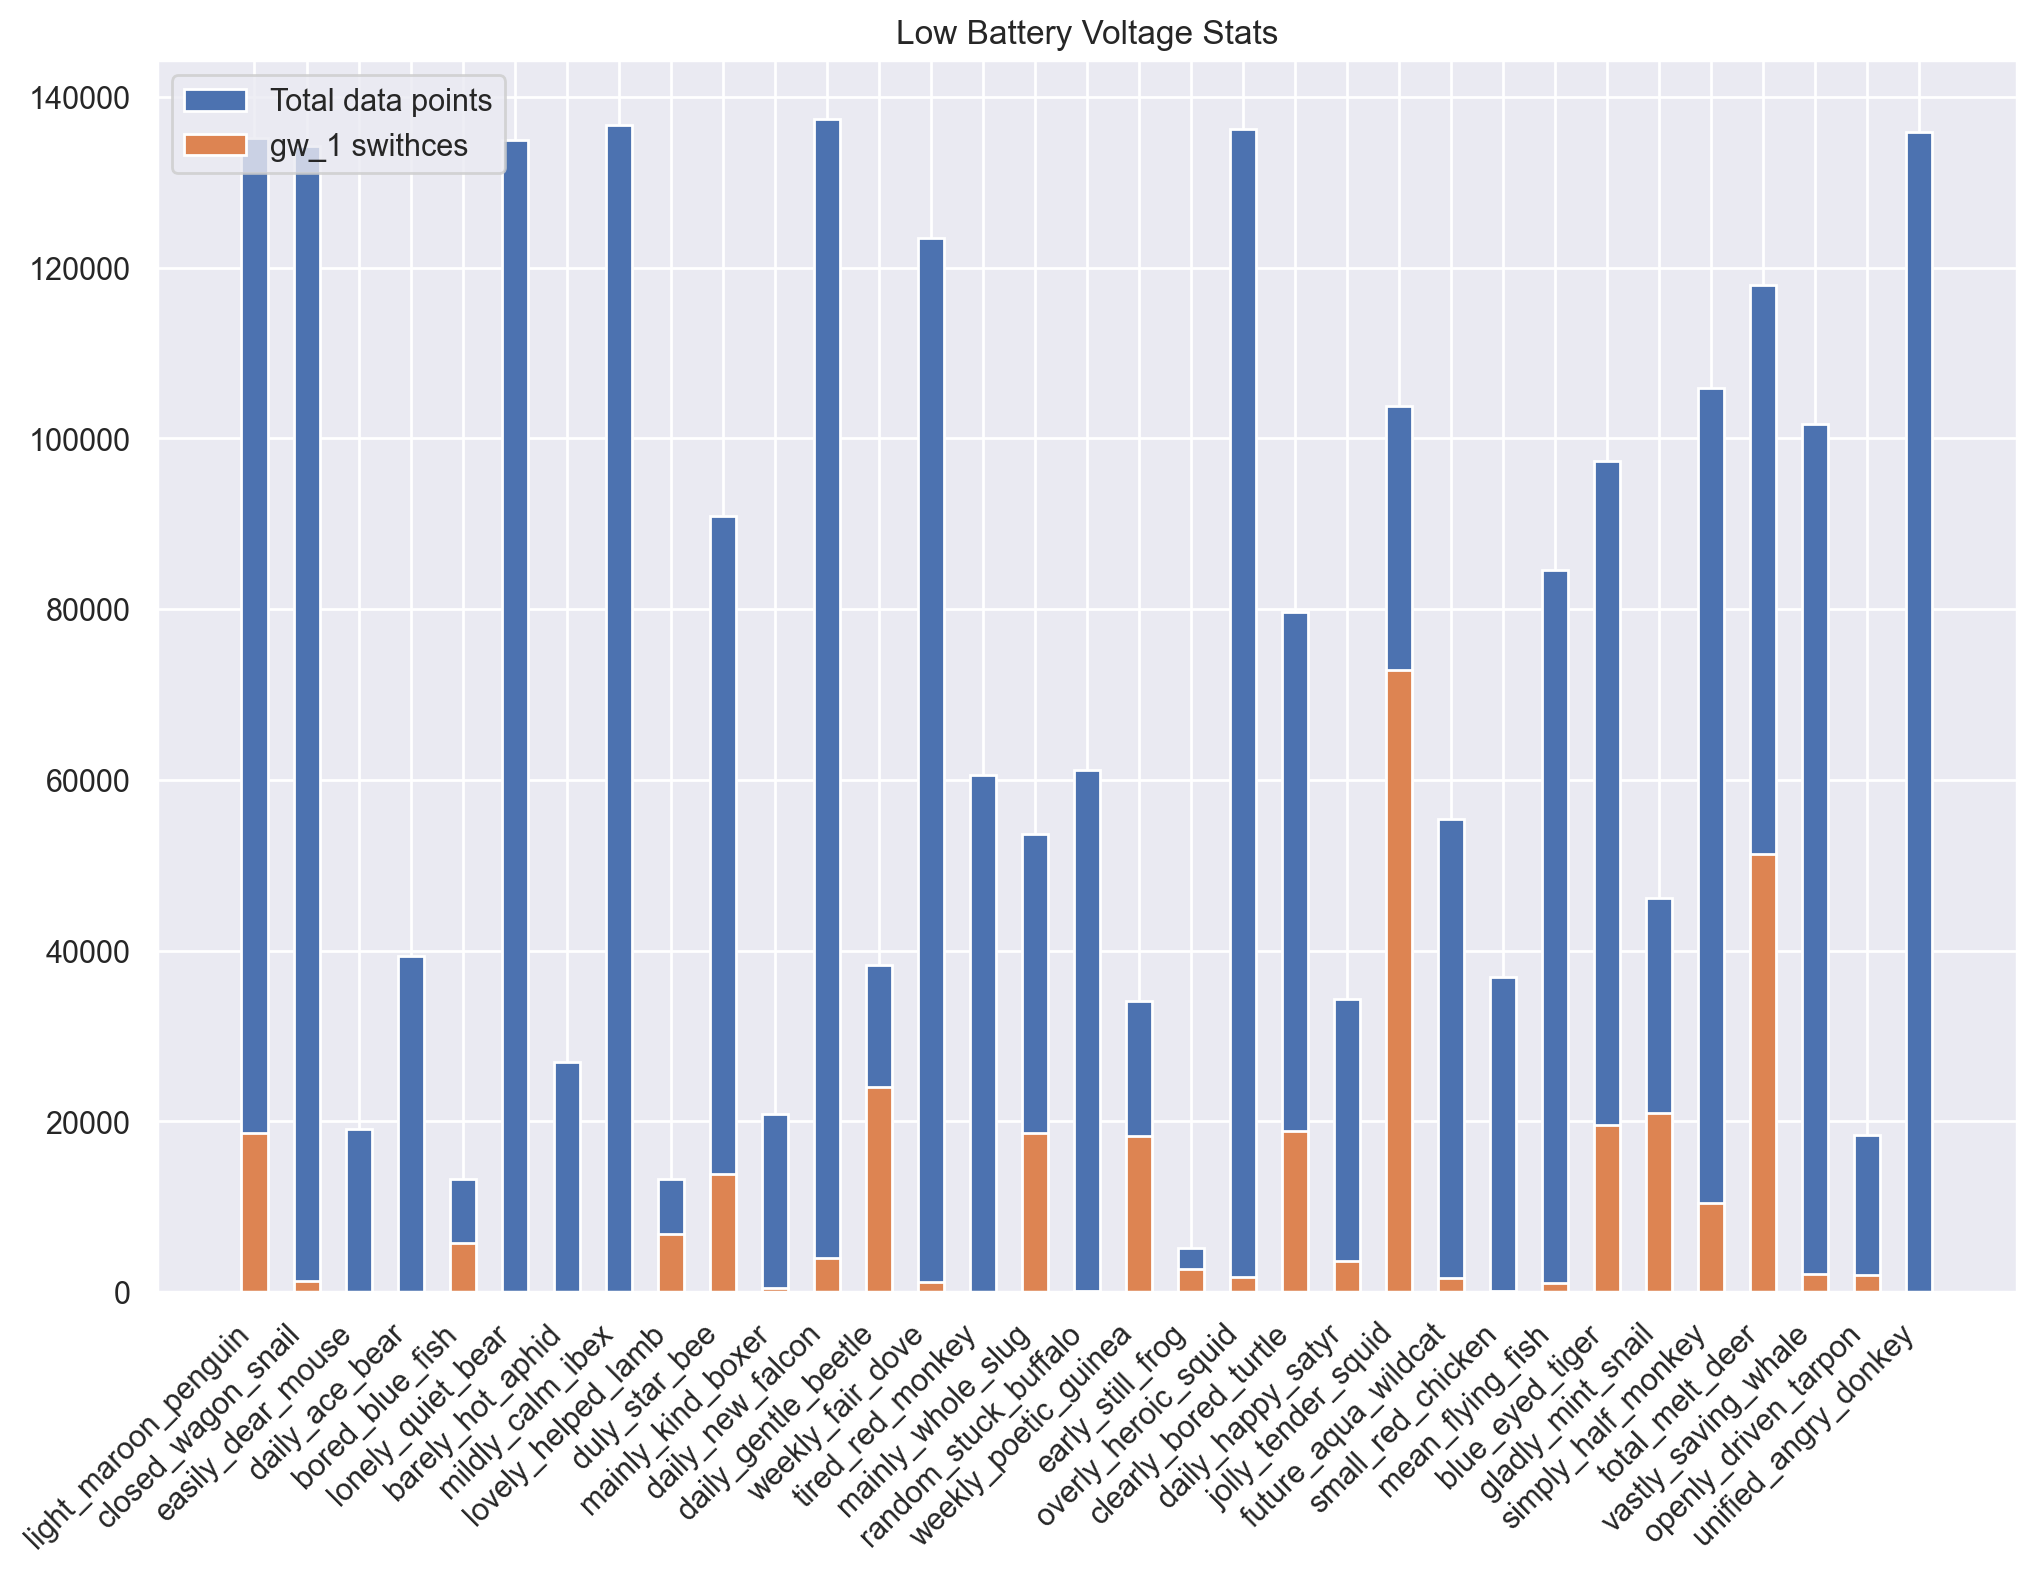

In [106]:
weight_counts = {
    "Total data points": np.array(total_x_points),
    #-np.array(count) ,
    "gw_1 swithces": np.array(count),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(x_sensor))

for boolean, weight_count in weight_counts.items():
    p = ax.bar(tuple(x_sensor), weight_count, width, label=boolean)
    bottom += weight_count

ax.set_title("Low Battery Voltage Stats")
ax.legend(loc="upper left")

plt.xticks(rotation=45, ha='right')

plt.show()

### Few of the sensor have switched their gw_1 in more than 50% of the data points they have

## Lets look at all the gateways.